# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica!
    
El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:

- En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
- En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
- En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.
    
En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal <a href="https://colab.research.google.com/drive/www.properati.com.ar" target="_blank">Properati</a>.

**Importante**: recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora.

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

## 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:

1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Sin una visualización previa del dataset con utilizaremos para la creacion del modelo de ML, teniendo en cuenta las características de una propiedad, creo que las siguientes podrian considerarse como posibles variables a involucrar, sin conocer, lógicamente, la influencia que pudiesen ejercer sobre la decisión que terminaran tomando nuestros clientes:

- **Cantidad de**:
    - $m^2$ cubiertos
    - $m^2$ totales
    - Dormitorios
    - Baños
    - Pisos
- **Tipo de inmueble**:
    - Casa
    - Departamento
    - Piso
    - Semi-piso
    - Duplex/Triplex
    - Cabaña
    - Otros
- **Tipos de ambientes**:
    - Cocina
    - Comedor
    - Cocina/comedor
    - Patio
    - Living
    - Living/comedor
    - Cochera
    - Sotano
    - SUM con/sin parrilla
- **Servicios incluidos/no incluidos**:
    - Luz
    - Gas
    - Internet WI-FI
    - Cloacas
    - Expensas
    - Impuesto inmobiliario
- **Ubicación del inmueble**:
    - Zona Centro
    - Zona Residencial
    - Zona Rural
    - Barrio no cerrado
    - Barrio cerrado
    - Caracteristicas de zonas aledañas

## 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

- ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
- ¿Cuántos valores faltantes hay en cada columna?
- ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
- ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
- ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset**

1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar <a href="https://www.properati.com.ar/data/" target="_blank">aquí</a>. Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte, Bs.As. G.B.A. Zona Sur y Bs.As. G.B.A. Zona Oeste` son regiones que conforman el <a href="https://es.wikipedia.org/wiki/Gran_Buenos_Aires" target="_blank">Gran Buenos Aires</a>, un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# Importar librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error, median_absolute_error, r2_score, f1_score, mean_absolute_percentage_error

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
# Carga del dataset (de ahora en mas DS) en formato csv
prop = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [4]:
print('El DS cuenta con', len(prop), 'filas y', len(prop.columns), 'columnas')

El DS cuenta con 146660 filas y 19 columnas


In [5]:
# Primera visualizacion de la morfologia del DS
# Imprimimos las primeras 5 filas
prop.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [6]:
# Imprimimos las ultimas 5 filas del DS
prop.tail()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta
146659,2019-07-31,2019-10-12,2019-07-31,-34.444760,-58.981885,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,2.0,1.0,75.0,75.0,98000.0,USD,Departamento en venta en Manzanares Chico,"Departamento en el Barrio Manzanares Chico , e...",Departamento,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [7]:
# Contar cantidad de valores nulos o tipo 'NaN'
prop.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [8]:
# Tipo de datos de cada una de las columnas del DS
prop.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [9]:
# Contabilizar valores unicos de las variables 'currency' y 'operation_type'
currency = len(pd.unique(prop['currency']))
operation_type = len(pd.unique(prop['operation_type']))

print('currency:', currency, '\n', 'operation_type:', operation_type)

currency: 1 
 operation_type: 1


- Como se puede observar, las variables `currency` y `operation_type` tienen un unico valor cada una, por lo que quedan **descartadas** para cualquier tipo de analisis. 
- A esto, sumarle que, las variables `title` y `description`, tambien quedan fuera de analisis ya que las mismas tienen datos cargados por los usuarios de Properati, por ende, no existe estandarizacion alguna de la informacion, y cualquier arreglo que pueda realizarse sobre dichas variables, demandara mas trabajo que el valor agregado que estas puedan sumar a cualquier modelo.

In [10]:
# Secuencia que determina si los datos de una variable son identicos a otra variable
start_date = prop['start_date']
created_on = prop['created_on']

variables = ['start_date', 'created_on']

mask = (start_date == created_on).sum()
values = len(prop.index)

if mask == values:
    print(f'Ambas variables {variables[0]} y {variables[1]} tienen los mismos datos')
else:
    print(f'Las variables {variables[0]} y {variables[1]} no tienen los mismos datos')

Ambas variables start_date y created_on tienen los mismos datos


- La variable `created_on` tiene los mismos valores que la variable `start_date`, por lo que sera descartada, ya que considerarla seria redundante.

In [11]:
# Convertimos las columnas de 'start_date' y 'end_date' en formato mes-año para la busqueda de un patron de manera mensual
prop['start_date'] = pd.to_datetime(prop['start_date'], errors = 'coerce', format = '%Y-%m-%d')
prop['end_date'] = pd.to_datetime(prop['end_date'], errors = 'coerce', format = '%Y-%m-%d')
prop.dtypes

start_date         datetime64[ns]
end_date           datetime64[ns]
created_on                 object
lat                       float64
lon                       float64
l1                         object
l2                         object
l3                         object
rooms                     float64
bedrooms                  float64
bathrooms                 float64
surface_total             float64
surface_covered           float64
price                     float64
currency                   object
title                      object
description                object
property_type              object
operation_type             object
dtype: object

In [12]:
# En dos nuevas columnas, coloca el mes-año correspondiente a 'start_date' y 'end_date', respectivamente
prop['start_date_month'] = pd.DatetimeIndex(prop['start_date']).month
prop['end_date_month'] = pd.DatetimeIndex(prop['end_date']).month

In [13]:
prop.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,start_date_month,end_date_month
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,...,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,10,12.0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,10,11.0
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,10,11.0
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,10,12.0
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,...,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta,10,3.0


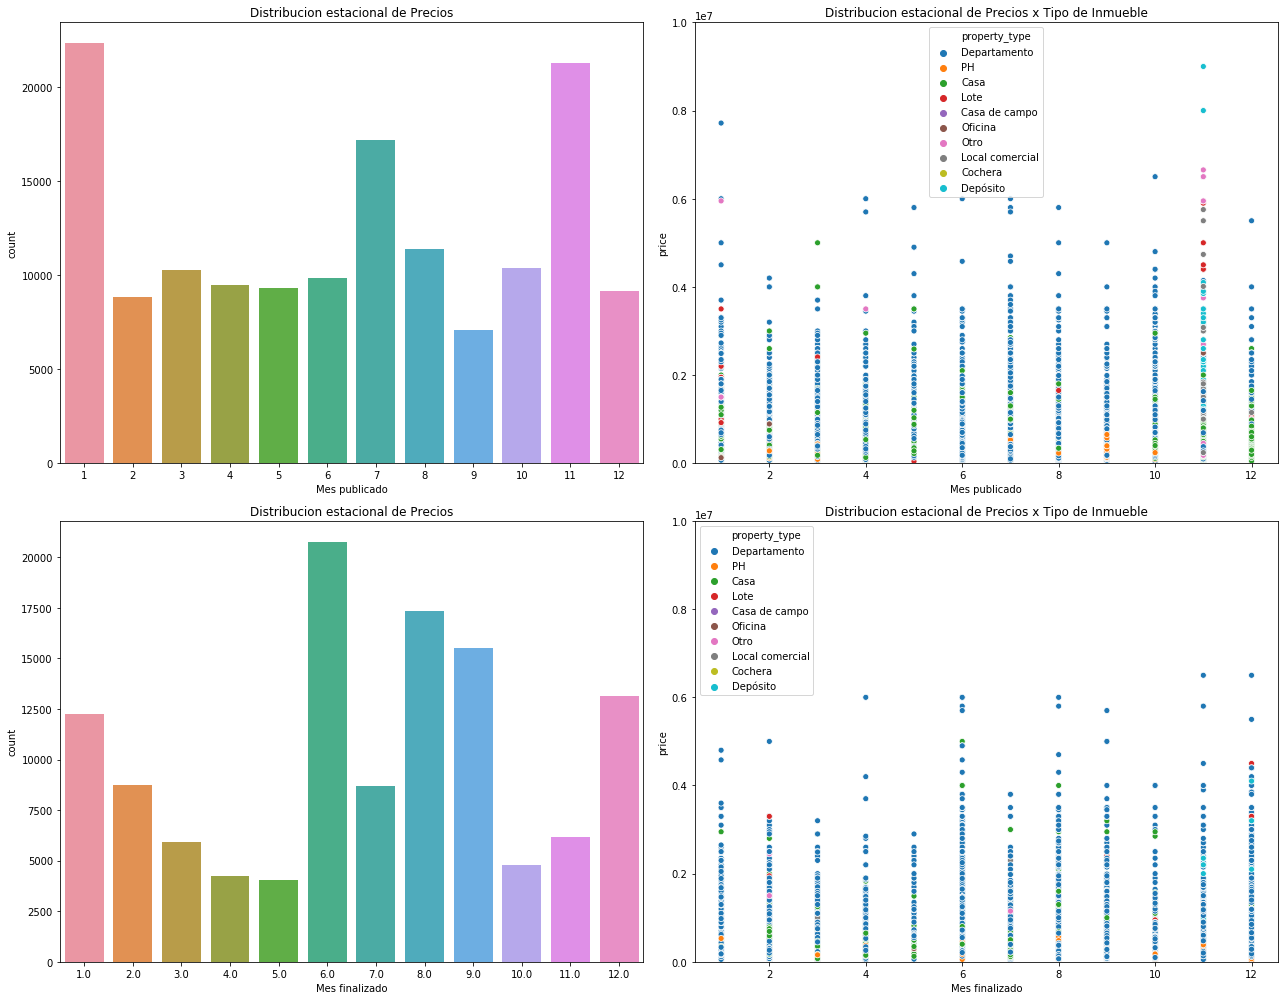

In [14]:
plt.figure(figsize = (18, 14))

plt.subplot(2, 2, 1)
start_date_count = sns.countplot(data = prop, x = 'start_date_month')
plt.title('Distribucion estacional de Precios')
plt.xlabel('Mes publicado')

plt.subplot(2, 2, 2)
sns.scatterplot(data = prop, x = 'start_date_month', y = 'price', hue = 'property_type')
plt.title('Distribucion estacional de Precios x Tipo de Inmueble')
plt.xlabel('Mes publicado')
plt.ylim(0, 1e7)

plt.subplot(2, 2, 3)
start_date_count = sns.countplot(data = prop, x = 'end_date_month')
plt.title('Distribucion estacional de Precios')
plt.xlabel('Mes finalizado')

plt.subplot(2, 2, 4)
sns.scatterplot(data = prop, x = 'end_date_month', y = 'price', hue = 'property_type')
plt.title('Distribucion estacional de Precios x Tipo de Inmueble')
plt.xlabel('Mes finalizado')
plt.ylim(0, 1e7)

plt.tight_layout()
plt.show()

- Observando los graficos inmediatos anteriores, podemos decir que no existe estacionalidad en la variacion de los precios de los inmuebles, por lo que las variables `start_date` y `end_date` no aportan informacion valiosa para el analisis del DS y estas seran descartadas para el modelo.
- Como comentario adicional, las variables `lat` y `lon` relacionadas al posicionamiento geografico, seran descartadas, ya que las mismas pueden ser reemplazadas facilmente por la variable `l3` que nos brinda informacion sobre la localidad de los inmuebles

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

En el DS encontramos 10 tipos de propiedades, los cuales son: ['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito'] 
 En el siguiente gráfico podemos observar la cantidad de inmuebles por su tipo: 



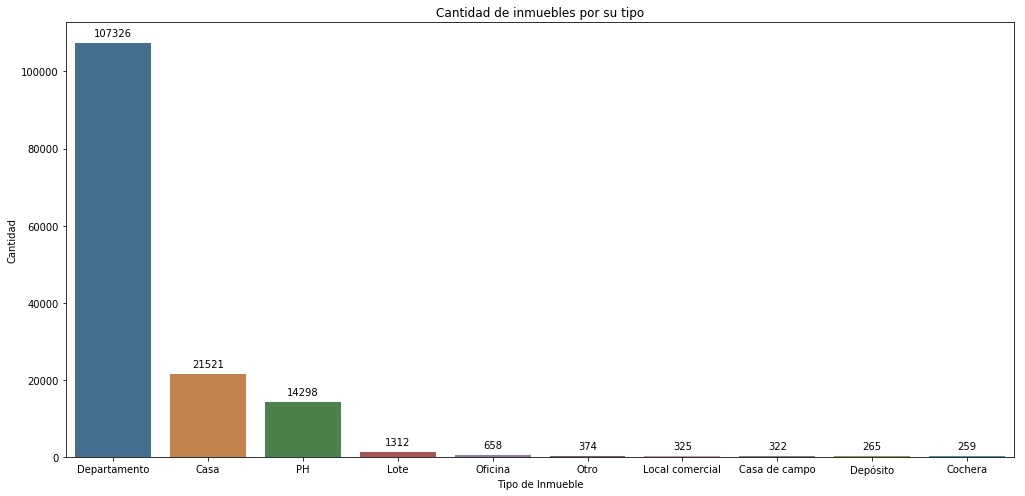

In [15]:
# Contabilizar cantidad de inmuebles por 'property_typt' o tipo de propiedad 

plt.figure(figsize = (17,8))
# Orden del countplot segun cantidad de veces que se repite el tipo de propiedad
cplot = sns.countplot(data = prop, x = 'property_type', order = prop['property_type'].value_counts().index, saturation = 0.5)

# Visualizar etiquetas de valores correspondiente a cada barra del barplot, indicando que se colocaran centradas según cada barra
for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset pixels')

plt.title('Cantidad de inmuebles por su tipo')
plt.xlabel('Tipo de Inmueble')
plt.ylabel('Cantidad')

# Contabilizacion de elementos unicos de tipos de departamento
deptype = pd.unique(prop['property_type']).tolist()
# Nombramos los diferentes tipos de departamentos del DS
unique_deptype = len(deptype)
print('En el DS encontramos', unique_deptype, 'tipos de propiedades, los cuales son:', deptype, '\n',
      'En el siguiente gráfico podemos observar la cantidad de inmuebles por su tipo:', '\n')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

[(0, 15000)]

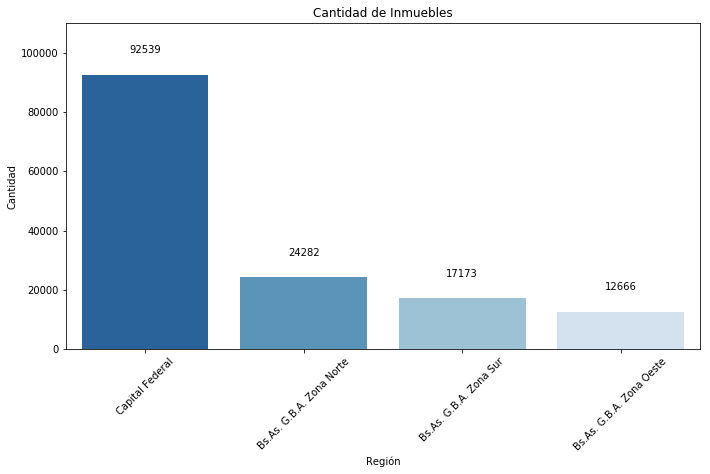

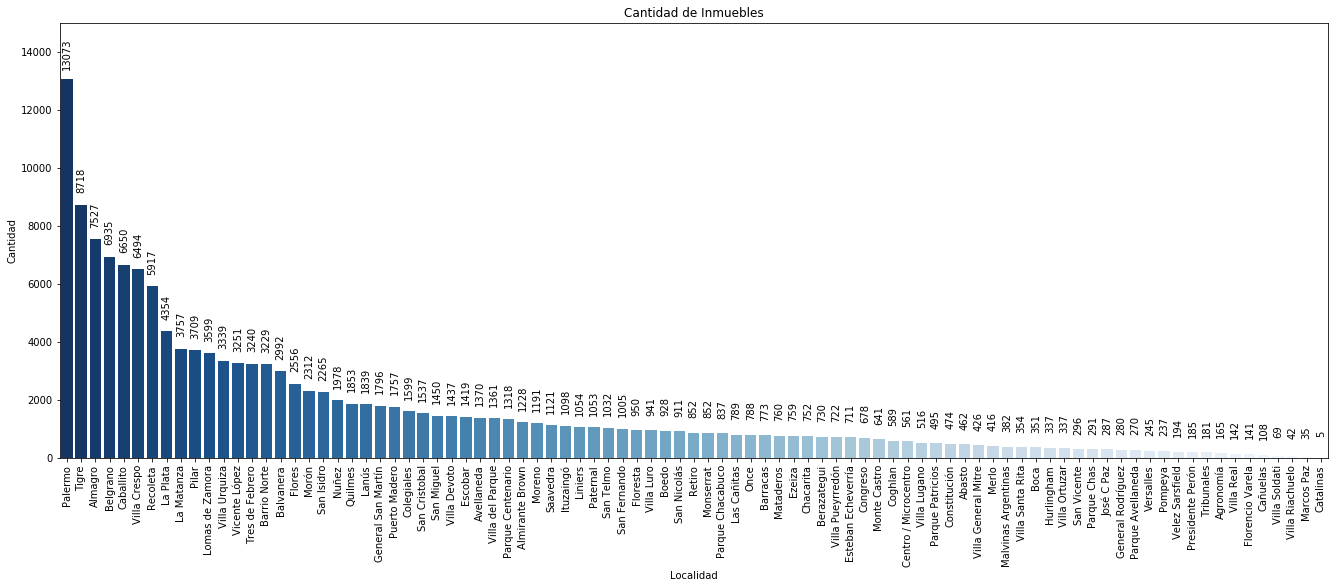

In [16]:
# Asignamos las variables para ambos ejes "x"
X1 = prop['l2']
X2 = prop['l3']

# Definimos el tamaño del gráfico 1
plt.figure(figsize = (25, 6))
# Definimos la posición del gráfico 1
plt.subplot(1, 2, 1)
# Ordenamos el countplot de mayor a menor según cantidades
cplot1 = sns.countplot(data = prop, x = X1, order = prop['l2'].value_counts().index, palette = 'Blues_r')
# Colocamos las etiquetas de los datos con orientacion vertical
for p in cplot1.patches:
    cplot1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset pixels')
# Colocamos las etiquetasl del eje "x" con orientacion diagonal
cplot1.set_xticklabels(cplot1.get_xticklabels(), rotation = 45)
# Asignamos nombre de eje "x", eje "y" y título del gráfico
plt.title('Cantidad de Inmuebles')
plt.xlabel('Región')
plt.ylabel('Cantidad')
cplot1.set(ylim = (0, 110000))

# Mismas operaciones para el gráfico 2
plt.figure(figsize = (50, 8))
plt.subplot(1, 2, 2)

cplot2 = sns.countplot(data = prop, x = X2, order = prop['l3'].value_counts().index, palette = 'Blues_r')

for p in cplot2.patches:
    cplot2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 500),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset pixels', rotation = 90)
    
cplot2.set_xticklabels(cplot2.get_xticklabels(), rotation = 90)

plt.title('Cantidad de Inmuebles')
plt.xlabel('Localidad')
plt.ylabel('Cantidad')
cplot2.set(ylim = (0, 15000))

- En los graficos anteriores, podemos observar que la region con mas inmuebles publicados es `Capital Federal`, mientras que las 5 localidades con mas inmuebles publicados son `Palermo`, `Tigre`, `Almagro`, `Belgrano` y `Caballito`.

5. **Filtrando el Dataset**: A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [17]:
# Rankeado calcuado de la region y los tipos de inmuebles con mas publicaciones

# Calculamos ranking de 'region'
region_rank = pd.DataFrame(prop['l2'].value_counts().rank(ascending = False))
region_rank = region_rank[region_rank['l2'] == 1].index

# Calculamos ranking de 'tipo de departamento'
tipo_prop_rank = pd.DataFrame(prop['property_type'].value_counts().rank(ascending = False))
tipo_prop_rank = tipo_prop_rank[(tipo_prop_rank['property_type'] == 1) | (tipo_prop_rank['property_type'] == 2) | (tipo_prop_rank['property_type'] == 3)].index

print('La region con mas propiedades es:', region_rank)
print('Los tipos de propiedades con mas inmuebles publicados son:', tipo_prop_rank)

La region con mas propiedades es: Index(['Capital Federal'], dtype='object')
Los tipos de propiedades con mas inmuebles publicados son: Index(['Departamento', 'Casa', 'PH'], dtype='object')


In [18]:
# Ahora, proseguimos a filtrar el DS con la region con mas propiedades publicadas y con las 3 mejores clases de tipos de propiedades

prop_clean = prop.loc[((prop['property_type'] == 'Departamento') | (prop['property_type'] == 'Casa') | (prop['property_type'] == 'PH')) & 
                    (prop['l2'] == 'Capital Federal')]
prop_clean.shape

(91485, 21)

- Vale destacar que al dejar unicamente 'Capital Federal', invirtio el 2° y 3° puesto del ranking de 'tipo de propiedades'

6. **Distribuciones y relaciones de a pares**: Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, price para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    2. Algunas instancias tienen valores de superficie (surface_total) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    3. Lo mismo ocurre con valores de superficie total muy chico.
    4. Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias.
    5. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    6. Una vez filtrado el dataset, puedes utilizar la función pairplot de Seaborn.

In [19]:
# Contar cantidad de valores nulos o tipo 'NaN' del nuevo DS
prop_clean.isna().sum()

start_date              0
end_date            10986
created_on              0
lat                  4534
lon                  4548
l1                      0
l2                      0
l3                      0
rooms                   0
bedrooms                0
bathrooms            2171
surface_total        8917
surface_covered      9235
price                   0
currency                0
title                   0
description             0
property_type           0
operation_type          0
start_date_month        0
end_date_month      10986
dtype: int64

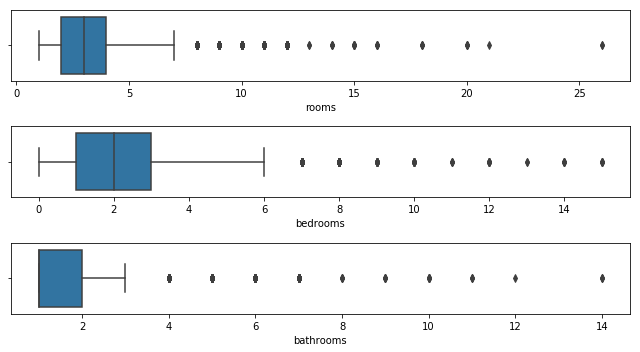

In [20]:
# Habiendo filtrado el DS, resaltamos el "aspecto" de la distribucion relacionada a los ambientes de los inmuebles con visualizaciones tipo boxplot
plt.figure(figsize = (9, 5))

plt.subplot(3, 1, 1)
sns.boxplot(data = prop_clean, x = prop_clean['rooms'], orient = 'h')

plt.subplot(3, 1, 2)
sns.boxplot(data = prop_clean, x = prop_clean['bedrooms'], orient = 'h')

plt.subplot(3, 1, 3)
sns.boxplot(data = prop_clean, x = prop_clean['bathrooms'], orient = 'h')

plt.tight_layout()

- Se puede ver que para los 3 tipos de "ambiente", existen valores atipicos o *outliers*, los cuales a priori podriamos decir que pueden deberse a un error de tipeo de los usuarios de Properati

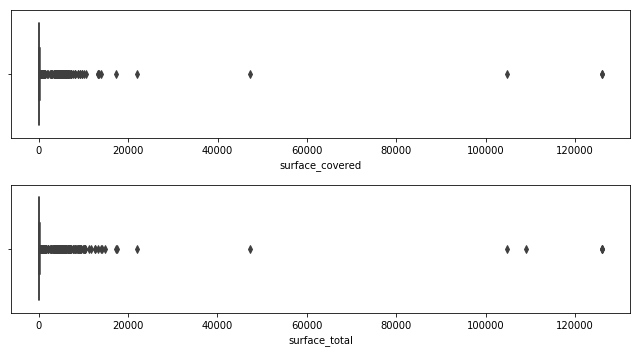

In [21]:
# Mismo analisis que el inmediato anterior, pero para las variables 'surface_covered' y 'surface_total'
plt.figure(figsize = (9, 5))

plt.subplot(2, 1, 1)
sns.boxplot(data = prop_clean, x = prop_clean['surface_covered'], orient = 'h')

plt.subplot(2, 1, 2)
sns.boxplot(data = prop_clean, x = prop_clean['surface_total'], orient = 'h')
plt.tight_layout()

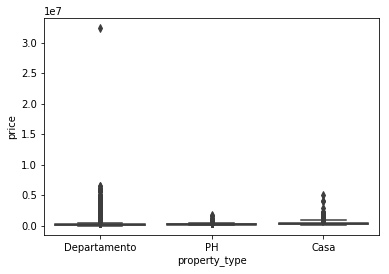

In [22]:
sns.boxplot(data = prop_clean, x = 'property_type', y = 'price')

- Si bien ya se menciono, existen datos atipicos para todas las variables, segun lo visualizado en los boxplot, por lo que, para no distorsionar los resultados del EDA, se procedera a realizar un filtado del DS para tener datos logicos o acordes a lo real.

De acuerdo a esto, filtraremos el DS con las siguientes condiciones:
- `surface_covered` menor o igual a `surface_total`, ya que carece de sentido que la superficie cubierta sea mayor a la superficie total
- `surface_covered` definos en valores mayores o igual a 20$m^2$ y a valores menores o igual a 290$m^2$
- `surface_total` para valores menores o igual a 290$m^2$
- `price` menor a USD650.000

In [23]:
# Filtramos 'price', 'surface_covered' y 'surface_total'
prop_clean_surface = prop_clean.loc[(prop_clean['surface_covered'] <= prop_clean['surface_total']) & 
                                    ((prop_clean['surface_covered'] >= 20) & (prop_clean['surface_covered'] <= 290)) &
                                   (prop_clean['surface_total'] <= 290) & (prop_clean['price'] < 650000)]
prop_clean_surface.shape

(74966, 21)

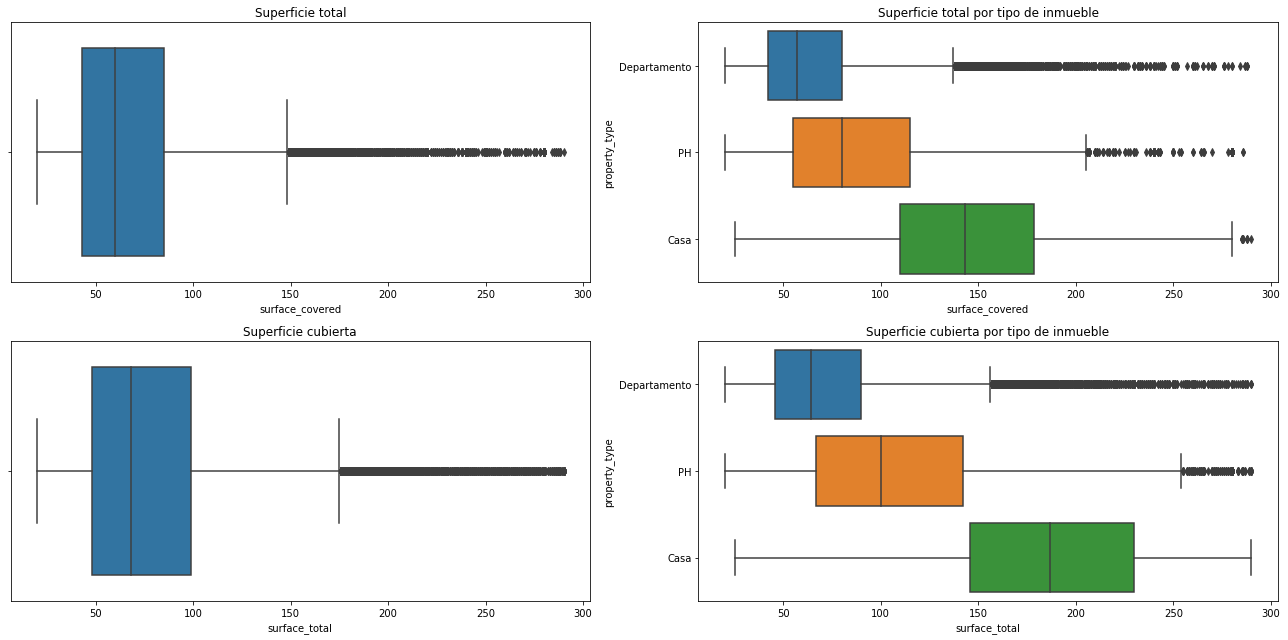

In [24]:
# Generamos un nuevo boxplot para visualizar como es la distribucion de los mismos luego de realizar una 'limpieza' de estos
plt.figure(figsize = (18, 9))

plt.subplot(2, 2, 1)
sns.boxplot(data = prop_clean_surface, x = prop_clean_surface['surface_covered'], orient = 'h')
plt.title('Superficie total')

plt.subplot(2, 2, 3)
sns.boxplot(data = prop_clean_surface, x = prop_clean_surface['surface_total'], orient = 'h')
plt.title('Superficie cubierta')

plt.subplot(2, 2, 2)
sns.boxplot(data = prop_clean_surface, x = prop_clean_surface['surface_covered'], y = 'property_type', orient = 'h')
plt.title('Superficie total por tipo de inmueble')

plt.subplot(2, 2, 4)
sns.boxplot(data = prop_clean_surface, x = prop_clean_surface['surface_total'], y = 'property_type', orient = 'h')
plt.title('Superficie cubierta por tipo de inmueble')

plt.tight_layout()

In [25]:
Q1 = prop_clean_surface[prop_clean_surface['property_type'] == 'Departamento'].quantile(q = 0.25)
Q3 = prop_clean_surface[prop_clean_surface['property_type'] == 'Departamento'].quantile(q = 0.75)
print('Q1 surface_covered:', Q1['surface_covered'], '\n', 'Q3 surface_covered:', Q3['surface_covered'], '\n',
     'Q1 surface_total:', Q1['surface_total'], '\n', 'Q3 surface_total:', Q3['surface_total'], '\n',)

Q1 surface_covered: 42.0 
 Q3 surface_covered: 80.0 
 Q1 surface_total: 46.0 
 Q3 surface_total: 90.0 



De los boxplots anteriores podemos mencionar que, si bien aun existen datos atipicos o *outliers*, esto puede deberse a que, como la mayor cantidad de inmuebles publicados son `Departamentos`, estos, por lo general, tienen una superficie menor a un `PH` y sobre todo a una `Casa`, entonces:
- No se filtraran mas datos, ya que, si bien el 50% de los datos para `Departamento` se encuentran entre 42$m^2$ y 80$m^2$ para superficie cubierta, y entre 46$m^2$ y 90$m^2$ para superficie total, en <a href="https://www.zonaprop.com.ar/departamentos-alquiler-capital-federal-mas-200-m2-cubiertos.html" target="_blank">este link</a> de **ZonaProp**, podemos ver que existen departamentos con superficie de mas de 200$m^2$.
- Con inmuebles de tipo `PH`, la situacion es similar.

In [26]:
# Clasificamos en grupo los precios de los inmuebles para poder facilitar graficamente la visualizacion de la distribucion de frecuencia

# labels = ['{0} - {1}'.format(i, i + 19) for i in range(0, 300, 20)]
# prop_clean_surface['group'] = pd.cut(prop_clean_surface.surface_total, range(0, 301, 20), right = False, labels = labels)
# plt.figure(figsize = (30, 10))
# distplot_surface = sns.countplot(data = prop_clean_surface[prop_clean_surface['surface_total'] <= 100], x = 'group')
# distplot_surface.set_xticklabels(distplot_surface.get_xticklabels(), rotation = 90)
# plt.xlim(0, 10)
# plt.xlabel('Superficie')
# plt.ylabel('Frecuencia')

# CONSULTAR COMO EVITAR LA ADVERTENCIA QUE ARROJA, YA QUE AL PARECER LOS RESULTADOS NO SON CORRECTOS!!!!!!

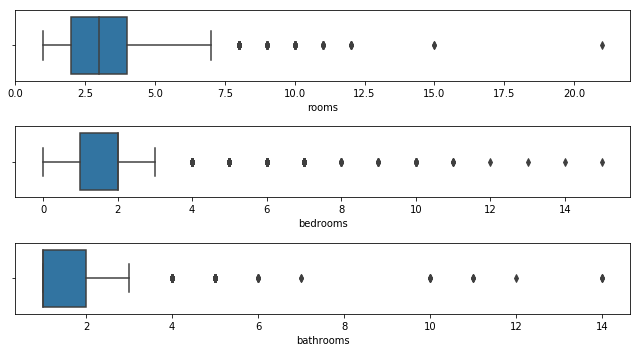

In [27]:
plt.figure(figsize = (9, 5))

plt.subplot(3, 1, 1)
sns.boxplot(data = prop_clean_surface, x = prop_clean_surface['rooms'], orient = 'h')

plt.subplot(3, 1, 2)
sns.boxplot(data = prop_clean_surface, x = prop_clean_surface['bedrooms'], orient = 'h')

plt.subplot(3, 1, 3)
sns.boxplot(data = prop_clean_surface, x = prop_clean_surface['bathrooms'], orient = 'h')

plt.tight_layout()

En relacion a la cantidad de ambientes de los inmuebles, se opto por no eliminar en su totalidad a los *outlayers*, es decir, establecer un "limite" que nos permita filtrar *outlaiers* pero asumir otros que nos pueda aportar informacion al analisis, ademas, que no queremos abusar de filtrar el DS. Por ende, el filtrado sera:
- `rooms` menor o igual a 8
- `bedrooms` menor o igual a 5
- `bathrooms` menor o igual a 5

In [28]:
# Filtrado del DS con las premisas anteriormente mencionadas
prop_clean_final = prop_clean_surface.loc[(prop_clean_surface['rooms'] <= 8) & ((prop_clean_surface['bedrooms'] <= 5) & (prop_clean_surface['bedrooms'] > 0)) &
                                          (prop_clean_surface['bathrooms'] <= 5)]
print(prop_clean_final.shape, prop_clean_surface.shape)

(73477, 21) (74966, 21)


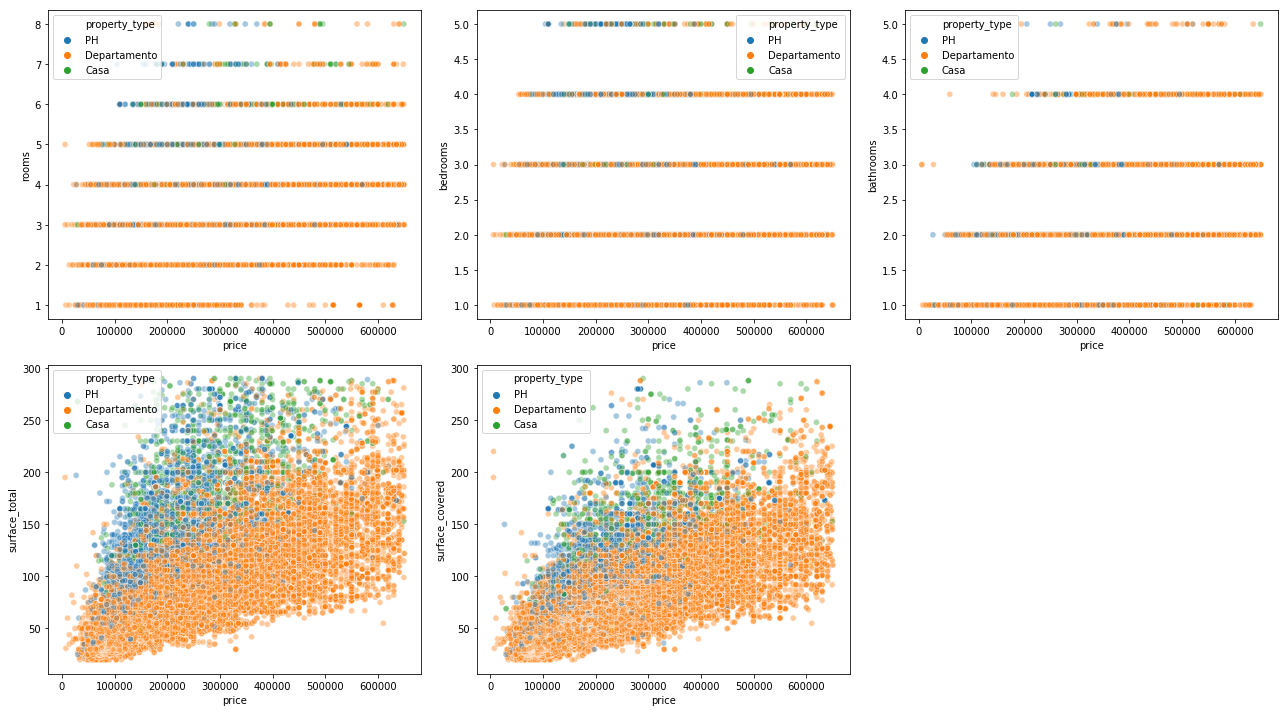

In [29]:
# Graficos de relacion de a pares
data = prop_clean_final
x = prop_clean_final['price']
hue = prop_clean_final['property_type']

plt.figure(figsize = (18, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(data = data, x = x, y = 'rooms', hue = hue, alpha = 0.4)

plt.subplot(2, 3, 2)
sns.scatterplot(data = data, x = x, y = 'bedrooms', hue = hue, alpha = 0.4)

plt.subplot(2, 3, 3)
sns.scatterplot(data = data, x = x, y = 'bathrooms', hue = hue, alpha = 0.4)

plt.subplot(2, 3, 4)
sns.scatterplot(data = data, x = x, y = 'surface_total', hue = hue, alpha = 0.4)

plt.subplot(2, 3, 5)
sns.scatterplot(data = data, x = x, y = 'surface_covered', hue = hue, alpha = 0.4)

plt.tight_layout()

En secuencia del 1 al 5 de izquierda a derecha y de arriba a abajo, podemos mencionar lo siguiente:
- **1 al 3** (ambientes): la clasificacion por `property_type` arroja una debil tendencia al aumentar la cantidad de ambientes. Misma observacion para el precio en funcion de la cantidad de ambientes.
- **4 al 5** (superficie): con areas poco mas definidas, se observa una relacion un tanto lineal en el aumento del precio a medida que aumenta la superficie, tanto cubierta como total.

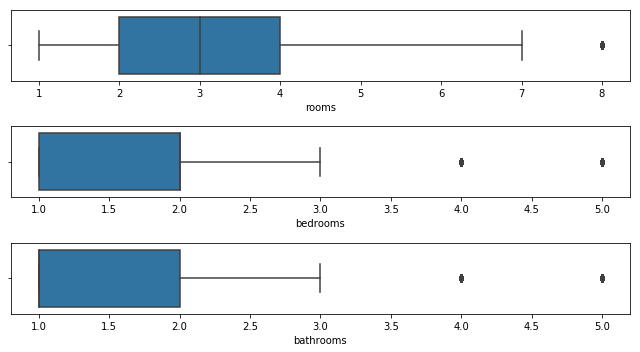

In [30]:
# Grafico tipo boxplot para visulizar el aspecto de la distribucion final de los ambientes luego del filtrado del DS
plt.figure(figsize = (9, 5))

plt.subplot(3, 1, 1)
sns.boxplot(data = prop_clean_final, x = prop_clean_final['rooms'], orient = 'h')

plt.subplot(3, 1, 2)
sns.boxplot(data = prop_clean_final, x = prop_clean_final['bedrooms'], orient = 'h')

plt.subplot(3, 1, 3)
sns.boxplot(data = prop_clean_final, x = prop_clean_final['bathrooms'], orient = 'h')

plt.tight_layout()

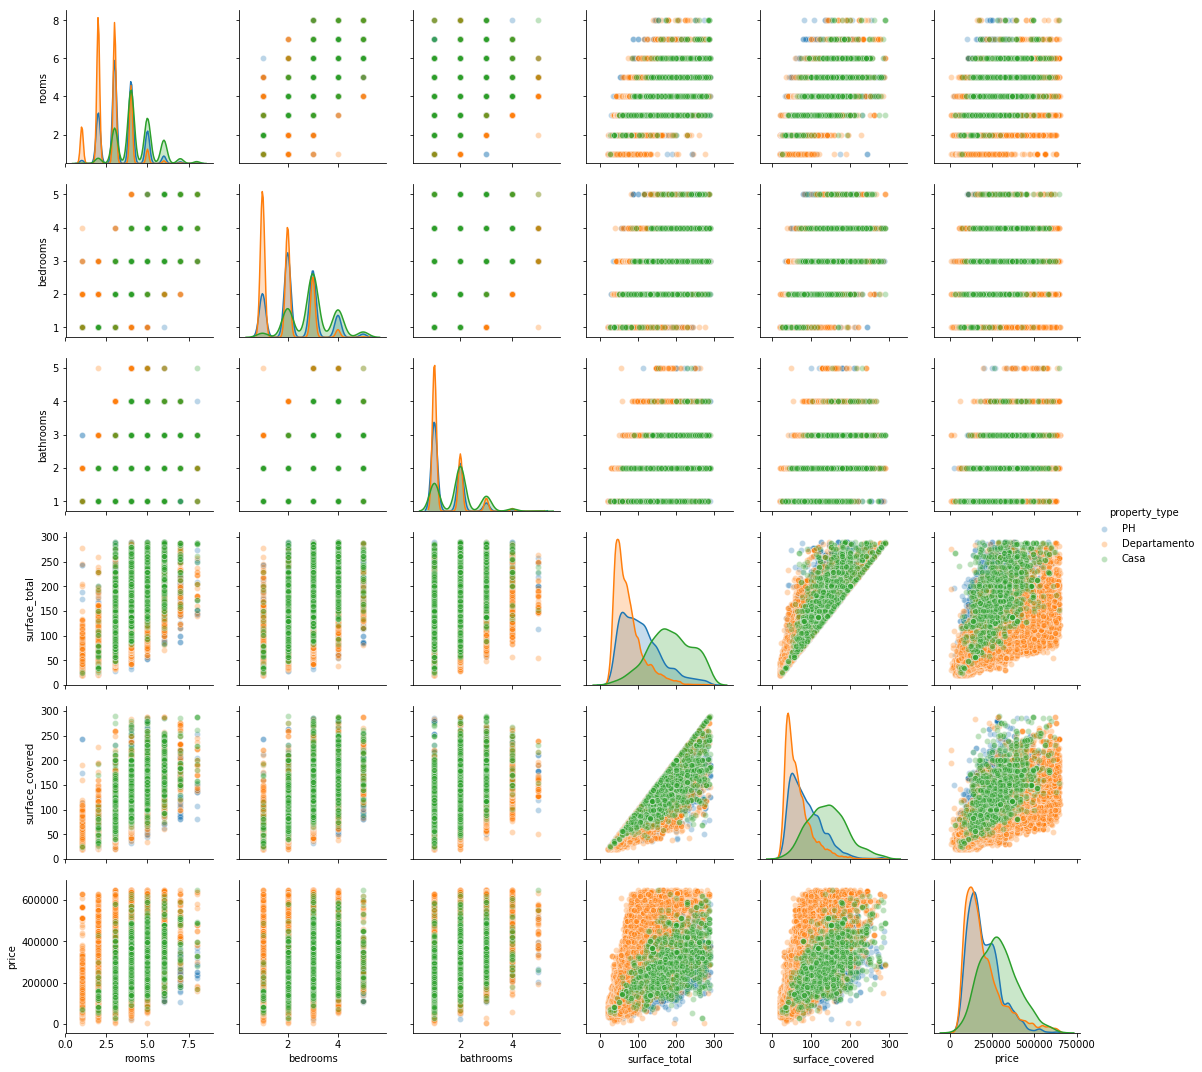

In [31]:
# Realizamos un 'pairplot' para observar las relaciones y distribuciones entre las distintas variables cuantitativas
# Eliminar variables que no van a ser incluidas en el pairplot
variables = prop_clean_final.drop(
                 ['lat', 'lon', 'start_date', 'end_date', 'created_on', 'l1', 'l2', 'l3', 'currency', 'title',
                  'description', 'property_type', 'operation_type', 'start_date_month', 'end_date_month'], axis = 1)
# Graficamos
sns.pairplot(prop_clean_final, hue = 'property_type', x_vars = variables.columns, y_vars = variables.columns, plot_kws = {'alpha' : 0.3})

7. **Correlaciones**: Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Text(0.5, 1.0, 'Correlacion entre variables')

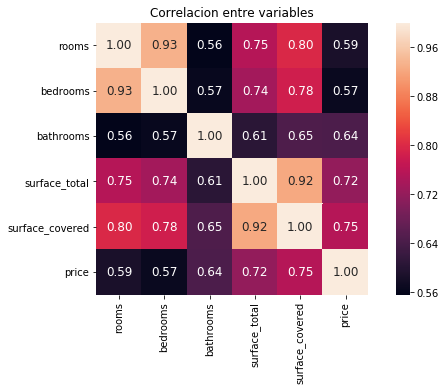

In [32]:
plt.figure(figsize = (10, 5))
# Calculo de las correlaciones entre las variables mencionadas, eliminando aquellas que no entraran en tal analisis
corr = prop_clean_final.drop(['lat', 'lon', 'start_date_month', 'end_date_month'], axis = 1).corr()

# Graficamos
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 12})
plt.title('Correlacion entre variables')

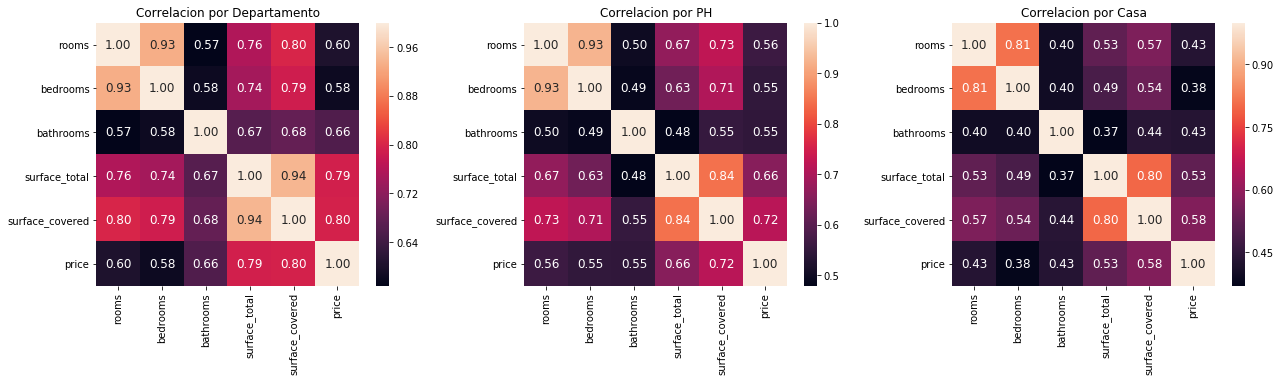

In [33]:
plt.figure(figsize = (18, 5))

corr_dep = prop_clean_final[prop_clean_final['property_type'] == 'Departamento'].drop(['lat', 'lon', 'start_date_month', 'end_date_month'], axis = 1).corr()
corr_ph = prop_clean_final[prop_clean_final['property_type'] == 'PH'].drop(['lat', 'lon', 'start_date_month', 'end_date_month'], axis = 1).corr()
corr_casa = prop_clean_final[prop_clean_final['property_type'] == 'Casa'].drop(['lat', 'lon', 'start_date_month', 'end_date_month'], axis = 1).corr()

plt.subplot(1, 3, 1)
sns.heatmap(corr_dep, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size' : 12})
plt.title('Correlacion por Departamento')

plt.subplot(1, 3, 2)
sns.heatmap(corr_ph, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size' : 12})
plt.title('Correlacion por PH')

plt.subplot(1, 3, 3)
sns.heatmap(corr_casa, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size' : 12})
plt.title('Correlacion por Casa')

plt.tight_layout()

In [34]:
# Calculo de la desviacion estandar de las variables segun el tipo de inmueble
Dep = prop_clean_surface[prop_clean_surface['property_type'] == 'Departamento'].drop(['lat', 'lon', 'start_date', 'end_date', 'start_date_month',
                                                                                     'end_date_month'], axis = 1).std()
PH = prop_clean_surface[prop_clean_surface['property_type'] == 'PH'].drop(['lat', 'lon', 'start_date', 'end_date', 'start_date_month',
                                                                                     'end_date_month'], axis = 1).std()
Casa = prop_clean_surface[prop_clean_surface['property_type'] == 'Casa'].drop(['lat', 'lon', 'start_date', 'end_date', 'start_date_month',
                                                                                     'end_date_month'], axis = 1).std()

print('DESVIACION ESTANDAR segun Tipo de Inmueble:', '\n', 'Departamento:', Dep, '\n', 'PH:', PH, '\n', 'Casa:', Casa)

DESVIACION ESTANDAR segun Tipo de Inmueble: 
 Departamento: rooms                   1.053301
bedrooms                0.875189
bathrooms               0.676660
surface_total          38.504391
surface_covered        33.230654
price              115045.798518
dtype: float64 
 PH: rooms                  1.234448
bedrooms               1.115546
bathrooms              0.713072
surface_total         55.305146
surface_covered       43.724231
price              94963.866588
dtype: float64 
 Casa: rooms                   1.273623
bedrooms                1.085306
bathrooms               0.812349
surface_total          58.148336
surface_covered        51.017980
price              110841.160978
dtype: float64


C:\Users\RY27844\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RY27844\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
C:\Users\RY27844\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the

Teniendo en cuenta la correlacion entre variables, las dos variables que podrian predecir mejor al precio de un inmueble son `surface_covered` y `surface_total`, pero tambien podriamos decir que al sumar las variables `bathrooms`, `bedrooms` y `rooms`, pueden aportar informacion valiosa para el modelo de prediccion.

Si bien las correlaciones varian segun el tipo de propiedad, las tendencias entre estas se mantienen. Sin embargo, podemos asumir que la "debilitacion" o "variacion negativa" de la correlacion entre los `property_type` se debe una mayor **desviacion estandar** en `PH` y `Casa`, en secuencia.

## 2.1. Desafío

Si analizamos la variable `property_type`, ¿podremos decir si la misma puede aportar informacion al modelo de ML?

In [35]:
# Definimos el DS para la respuesta de la pregunta planteada, con los filtros defininos anteriormente
prop_desafio = prop.loc[(prop['surface_covered'] <= prop['surface_total']) & 
                        ((prop['surface_covered'] >= 20) & (prop['surface_covered'] <= 290)) &
                        (prop['surface_total'] <= 290) & (prop['price'] < 650000) &
                        (prop['rooms'] <= 8) & ((prop['bedrooms'] <= 5) & (prop['bedrooms'] > 0)) & (prop['bathrooms'] <= 5) &
                        ((prop['property_type'] == 'Departamento') | (prop['property_type'] == 'PH') | (prop['property_type'] == 'Casa'))]

In [36]:
# Convertimos en integrer la variable categorica 'propert_type' para poder analizarla dentro de la correlacion
prop_desafio2 = prop_desafio.replace(['Departamento', 'PH', 'Casa'], [0, 1, 2])

In [37]:
# Chequeamos que la variable 'property_type' tenga el type correspondiente
prop_desafio2.dtypes

start_date          datetime64[ns]
end_date            datetime64[ns]
created_on                  object
lat                        float64
lon                        float64
l1                          object
l2                          object
l3                          object
rooms                      float64
bedrooms                   float64
bathrooms                  float64
surface_total              float64
surface_covered            float64
price                      float64
currency                    object
title                       object
description                 object
property_type                int64
operation_type              object
start_date_month             int64
end_date_month             float64
dtype: object

Text(0.5, 1.0, 'Correlacion entre variables')

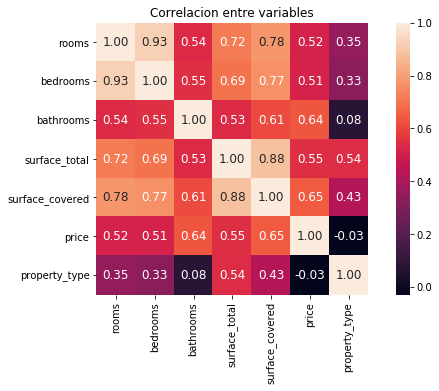

In [38]:
# Creamos un heatmap para ver la correlacion entre las variables, agregando la nueva variable tipo integrer 'property_type'
plt.figure(figsize = (10, 5))

corr_desaf = prop_desafio2.drop(['lat', 'lon', 'start_date_month', 'end_date_month'], axis = 1).corr()

sns.heatmap(corr_desaf, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 12})
plt.title('Correlacion entre variables')

Se puede ver que no existe correlacion entre la variable `price` y `property_type`, al menos con este DS, y vale aclararlo, ya que el DS podria estar sesgado por las ubicaciones de las publicaciones que econtramos en el mismo. Esto, debido a que la cantidad de instancias de tipo de Inmueble `PH` y `Casa` puede que tengan mayor cantidad de inmuebles publicados para otras localidades/barrios de la provincia de Buenos Aires.

## 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión - para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

- Elegir una métrica apropiada para evaluar los resultados de los modelos.
- Seleccionar las variables predictoras (X) y la variable a predecir (y).
- Realizar un Train/Test split de los datos.
- Generar un modelo benchmark y evaluarlo.
- Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
- Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
- Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
- Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?
- Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?- - ¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.

**Importante**: para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
2. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
3. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
4. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
5. Descarta aquellas instacias con valores faltantes.

**Checkpoint**: deberías obtener un dataset con 81019 instacias y 6 columnas.

In [39]:
prop.shape

(146660, 21)

In [40]:
# Filtrado del DS con las premisas mencionadas anteriormente
prop_ml = prop.loc[(prop['l2'] == 'Capital Federal') & 
                   ((prop['property_type'] == 'Departamento') | (prop['property_type'] == 'Casa') | (prop['property_type'] == 'PH')) &
                   ((prop['surface_total'] >= 15) & (prop['surface_total'] <= 1000)) &
                   (prop['price'] <= 4000000)]
prop_ml = prop_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
prop_ml.dropna(inplace = True)
prop_ml.shape

(81019, 6)

Sin embargo, hay una premisa que no se tuvo en cuenta que anteriormente en el EDA si se incluyo, que es descartar las propiedades en que `surface_covered` fuese mayor a `surface_total`. Por ende, verificamos primero si existen casos de tal tipo:

In [41]:
# Calculo de cantidad de casos en que se cumple la condicion superficie cubierta mayor a la total
surface = prop_ml[prop_ml['surface_covered'] > prop_ml['surface_total']]
len(surface)

743

Existen 743 casos en el que se cumple que `surface_covered` es mayor a `surface_total`. Como estos casos son inconsistentes, se filtraran.

In [42]:
prop_ml = prop.loc[(prop['l2'] == 'Capital Federal') & 
                   ((prop['property_type'] == 'Departamento') | (prop['property_type'] == 'Casa') | (prop['property_type'] == 'PH')) &
                   ((prop['surface_total'] >= 15) & (prop['surface_total'] <= 1000)) &
                   (prop['price'] <= 4000000) &
                   (prop['surface_covered'] <= prop['surface_total'])]
prop_ml = prop_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
prop_ml.dropna(inplace = True)
prop_ml.shape

(80276, 6)

#### 3.1. KNN

In [43]:
# Definimos nuestras variables 'X' e 'y'
X = prop_ml.drop(['price'], axis = 1)
y = prop_ml.price
print(X.shape, y.shape)

(80276, 5) (80276,)


Separamos un 15% de los datos para `test` debido a que no disponemos de una gran cantidad de datos

In [44]:
# Definimos los datos para train y test
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size = 0.15, random_state = 42)
print(X_train_knn.shape, y_train_knn.shape, X_test_knn.shape, y_test_knn.shape)

(68234, 5) (68234,) (12042, 5) (12042,)


In [45]:
# Calculamos los diferentes valores que puede tomar r2 en funcion de un k de vecinos
lista_accuracy_train_knn_r2 = []
lista_accuracy_test_knn_r2 = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Definir el modelo con el valor de vecinos deseado
    regressor_knn = KNeighborsRegressor(n_neighbors= k, weights = 'uniform')
    
    # Entrenar el modelo
    regressor_knn.fit(X_train_knn, y_train_knn)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_knn = regressor_knn.predict(X_train_knn)
    train_acc_knn =  r2_score(y_train_knn, y_train_pred_knn)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_knn = regressor_knn.predict(X_test_knn)
    test_acc_knn =  r2_score(y_test_knn, y_test_pred_knn)
    
    # Agregar la información a las listas
    lista_accuracy_train_knn_r2.append(train_acc_knn)
    lista_accuracy_test_knn_r2.append(test_acc_knn)

Text(0, 0.5, 'r2_score')

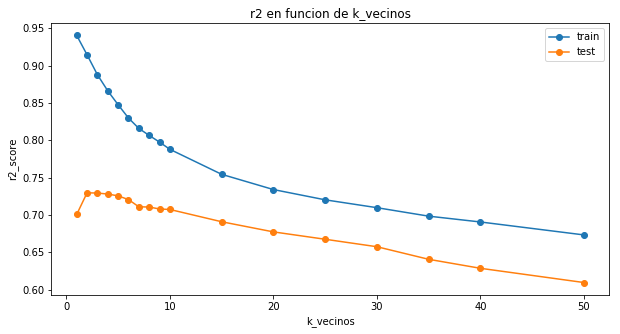

In [46]:
# Graficamos los valores de r2 en funcion de una lista definidia de k vecinos
plt.figure(figsize = (10, 5))
plt.plot(k_vecinos, lista_accuracy_train_knn_r2, 'o-', label = 'train' )
plt.plot(k_vecinos, lista_accuracy_test_knn_r2, 'o-',label = 'test')
plt.legend()
plt.title('r2 en funcion de k_vecinos')
plt.xlabel('k_vecinos')
plt.ylabel('r2_score')

Con el grafico anterior intentamos buscar cual es el mejor 'k' vecinos para encontrar un modelo que este, en lo posible, en terminos medios de overfiting y underfiting. Segun esto, se considera que un k igual a 15 es la mejor opcion.

In [47]:
# Creamos el modelo de KNN regresor
regressor_knn = KNeighborsRegressor(n_neighbors = 15, weights = 'uniform')
# Luego, entrenamos nuestro modelo
regressor_knn.fit(X_train_knn, y_train_knn)

KNeighborsRegressor(n_neighbors=15)

In [48]:
# Predecimos las etiquetas sobre los conjuntos de datos de 'train' y 'test'
y_train_pred_knn = regressor_knn.predict(X_train_knn)
y_test_pred_knn = regressor_knn.predict(X_test_knn)

In [49]:
# Calculamos diferentes metricas del modelo para conocer la precision del mismo
RMSE = math.sqrt(mean_squared_error(y_train_knn, y_train_pred_knn))
r2 = r2_score(y_train_knn, y_train_pred_knn)
# MAPE = mean_absolute_percentage_error(y_train_knn, y_train_pred_knn)

print('RMSE:', RMSE, '\n', 'r2:', r2)

RMSE: 149022.28734888465 
 r2: 0.7544738647248015


En funcion de ambas metricas, podemos mencionar que el modelo de metodologia KNN tiene una buena performance, teniendo en cuenta:
- La eleccion del error RMSE se debe a que este penaliza en mayor medida o de manera mas acentuada a los errores mas grandes, es decir, a aquellas predicciones en donde el error es muy grande, incrementando de esta manera el resultlado de RMSE. Teniendo en cuenta que el valor redondeado de este es de 148.000 (mismas unidades que nuestra variable *target*), y, ademas, que el valor maximo de `price` que tiene el DS de 4.000.000, puede decirse que es un error aceptablemente bajo.
- Y la eleccion del $r^2$ se debe a que este tiene como unidad de medida un porcentaje como resultado, diciendonos el grado en que nuestro modelo explica la variacion de nuestros datos. Siendo este del 75,6%, es un buen valor.

Modelo: KNN


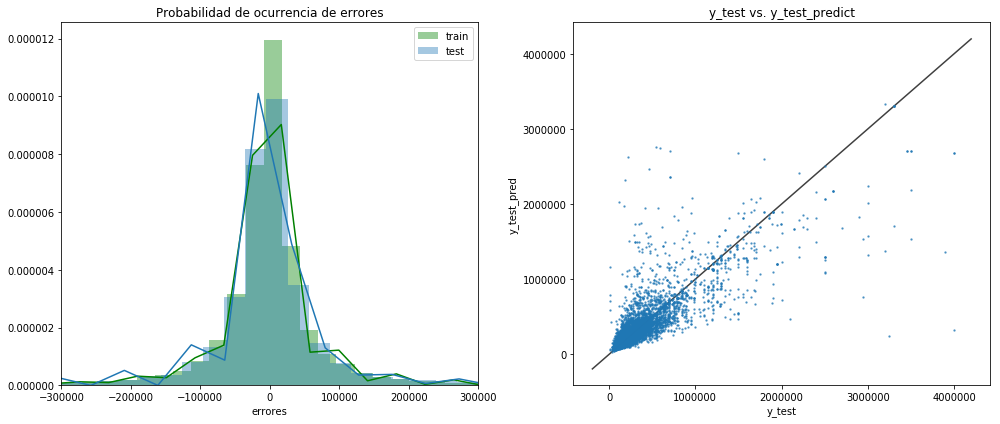

In [57]:
plt.figure(figsize = (14, 6))

# Graficamos los errores en funcion de probabilidad de ocurrencia
plt.subplot(1, 2, 1)
sns.distplot(y_train_knn - y_train_pred_knn, bins = 200, label = 'train', kde = True, color = 'g')
sns.distplot(y_test_knn - y_test_pred_knn, bins = 200, label = 'test', kde = True)
plt.xlim((-300000, 300000))
plt.xlabel('errores')
plt.legend()
plt.title('Probabilidad de ocurrencia de errores')

# Graficamos la relacion de distribucion entre los datos testeados y los datos predichos
ax = plt.subplot(1, 2, 2)
ax.scatter(y_test_knn, y_test_pred_knn, s = 2, alpha = 0.6)    
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('y_test vs. y_test_predict')

print('Modelo: KNN')
plt.tight_layout()
plt.show()

#### 3.2. Arbol de Decision

In [58]:
# Definimos los datos para train y test
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size = 0.15, random_state = 42)
print(X_train_tree.shape, y_train_tree.shape, X_test_tree.shape, y_test_tree.shape)

(68234, 5) (68234,) (12042, 5) (12042,)


In [59]:
lista_accuracy_train_tree_r2 = []
lista_accuracy_test_tree_r2 = []

# Definimos la lista de valores de k que vamos a explorar
max_d = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for d in max_d:
    
    # Definir el modelo con el valor de vecinos deseado
    regressor_tree = DecisionTreeRegressor(max_depth = d, random_state = 42)
    
    # Entrenar el modelo
    regressor_tree.fit(X_train_tree, y_train_tree)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_tree = regressor_tree.predict(X_train_tree)
    train_acc_tree =  r2_score(y_train_tree, y_train_pred_tree)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_tree = regressor_tree.predict(X_test_tree)
    test_acc_tree =  r2_score(y_test_tree, y_test_pred_tree)
    
    # Agregar la información a las listas
    lista_accuracy_train_tree_r2.append(train_acc_tree)
    lista_accuracy_test_tree_r2.append(test_acc_tree)

Text(0, 0.5, 'r2_score')

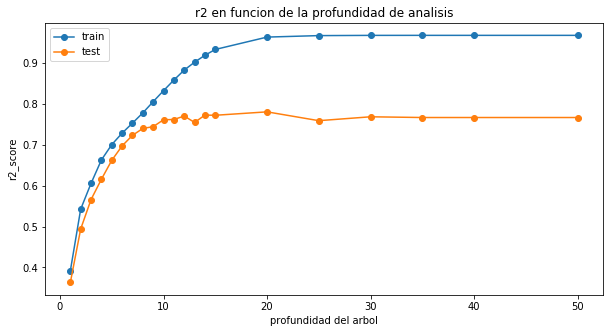

In [60]:
plt.figure(figsize = (10, 5))
plt.plot(max_d, lista_accuracy_train_tree_r2, 'o-',label = 'train' )
plt.plot(max_d, lista_accuracy_test_tree_r2, 'o-',label = 'test')
plt.legend()
plt.title('r2 en funcion de la profundidad de analisis')
plt.xlabel('profundidad del arbol')
plt.ylabel('r2_score')

De acuerdo al grafico anterior, se considera como mejor opcion una profundidad de 11 para nuestro arbol de decision.

In [61]:
# Creamos el modelo de Arbol de Decision
regressor_tree = DecisionTreeRegressor(max_depth = 11, random_state = 42)
# Entramiento de los datos
regressor_tree.fit(X_train_tree, y_train_tree)

DecisionTreeRegressor(max_depth=11, random_state=42)

In [62]:
# Predecimos las etiquetas sobre los conjuntos de datos de 'train' y 'test'
y_train_pred_tree = regressor_tree.predict(X_train_tree)
y_test_pred_tree = regressor_tree.predict(X_test_tree)

In [63]:
# Calculamos las metricas elegidas
RMSE = math.sqrt(mean_squared_error(y_train_tree, y_train_pred_tree))
r2 = r2_score(y_train_tree, y_train_pred_tree)
# MAPE = mean_absolute_percentage_error(y_train_tree, y_train_pred_tree)

print('RMSE:', RMSE, '\n', 'r2:', r2)

RMSE: 113446.00179934231 
 r2: 0.8577102334886635


Ya que la explicacion es similar a la realizada en esta misma instancia pero del KNN, entonces:
- Un RMSE igual a 113.500
- Un $r^2$ igual a 85,8%

Modelo: Arbol de Decision


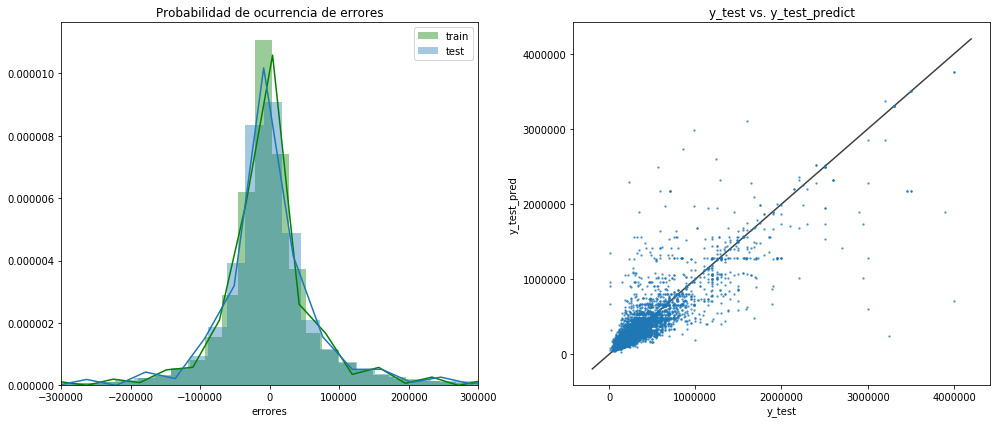

In [65]:
plt.figure(figsize = (14, 6))

# Graficamos los errores en funcion de probabilidad de ocurrencia
plt.subplot(1,2,1)
sns.distplot(y_train_tree - y_train_pred_tree, bins = 200, label = 'train', color = 'g', kde = True)
sns.distplot(y_test_tree - y_test_pred_tree, bins = 200, label = 'test', kde = True)
plt.xlim((-300000, 300000))
plt.xlabel('errores')
plt.legend()
plt.title('Probabilidad de ocurrencia de errores')

# Graficamos la relacion de distribucion entre los datos testeados y los datos predichos
ax = plt.subplot(1,2,2)
ax.scatter(y_test_tree, y_test_pred_tree, s = 2, alpha = 0.6)    
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('y_test vs. y_test_predict')

print('Modelo: Arbol de Decision')
plt.tight_layout()
plt.show()

Como conclusion de todo lo realizado anteriormente, podemos decir que para nuestro modelo de ML, la mejor metodologia a elegir para predecir los precios de los inmuebles es a traves de un **Arbol de Decision**, ya que, como vimos, mediante las metricas elegidas, tiene mejores resultados que con la metodologia KNN.

#### 3.3. Benchmark

Para poder terminar de definir si nuestro modelo es bueno o puede ser aun mejor, realizamos una comparacion con otro modelo base, como es un modelo de **Regresion Lineal**. Para eso, procedemos a calcular nuestro modelo.

In [66]:
# Definimos los datos para train y test
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y, test_size = 0.15, random_state = 42)
print(X_train_linear.shape, y_train_linear.shape, X_test_linear.shape, y_test_linear.shape)

(68234, 5) (68234,) (12042, 5) (12042,)


In [67]:
# Creamos el modelo de Regresion Lineal
linear_model = LinearRegression()

In [68]:
# Entrenamos los datos
linear_model.fit(X_train_linear, y_train_linear)

LinearRegression()

In [69]:
# Predecimos las etiquetas sobre los conjuntos de datos de 'train' y 'test'
y_train_pred_linear = linear_model.predict(X_train_linear)
y_test_pred_linear = linear_model.predict(X_test_linear)

In [70]:
# Calculamos las metricas elegidas
RMSE = math.sqrt(mean_squared_error(y_train_linear, y_train_pred_linear))
r2 = r2_score(y_train_linear, y_train_pred_linear)

print('RMSE:', RMSE, '\n', 'r2:', r2)

RMSE: 183472.69273285964 
 r2: 0.6278327551063442


##### Teniendo en cuenta que las metricas del modelo de Regresion Lineal tuvieron resultados mas bajos a los de Arbol de Decision y KNN, ahora si, podemos definitivamente concluir que la mejor metodologia para nuestro modelo de Machine Learning para predecir los precios de los inmuebles es el de **Arbol de Decision**

## 4. Cierre

La base de datos brindada por Properati cumple con los requisitos para poder hacer el desarrollo del modelo de Machine Learning para la prediccion del Precio de las propiedades, ya que, como vimos, si bien de las dos metodologias analizadas hay una que tiene una mejor performance que otra, ambas arrojan resultados correctos y aceptables. Sin embargo, para poder crear un modelo en el que nos aseguremos que el *target* predicho sea representativo de la Poblacion, deberiamos o podriamos:

- Tratar de hacerse de un DS con mayor cantidad de datos, con el objetivo de que la Muestra represente "mejor" a la variacion de los datos de la Poblacion que queremos explicar.
- De lo anterior, se desprende que podriamos aumentar el `test_size` para poder probar el modelo creado con una mayor cantidad de datos, y, de esta manera, tener un mejor ajuste sobre el modelo.
- Tener en cuenta la antiguedad de los inmuebles, que no se encuentra en el DS, pero que es de vital importancia, ya que, por regla general, inmuebles de las mismas caracteristicas, disminuye su precio de venta a medida que aumentan los años de antiguedad.
- Considerar si la venta es "de pozo" o "particular". Si bien, esto puede llegar a aplicar unicamente para Departamentos o PH, considerando que el DS tiene en su mayoria Departamentos, puede ser un dato que aporte valor al modelo, ya que el precio de venta de "particular" de un mismo departamento, puede ser mayor al precio de venta "de pozo".

Creo que considerando lo anterior, ayudaria a nuestro modelo a tener mayor certeza en la prediccion del precio. De todas maneras, el modelo conseguido, es un buen predictor.